# Cross-Modality Association Network

## Typical Data pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Padded.csv')

In [3]:
df_2=df

In [4]:
df_2.columns

Index(['Unnamed: 0', 'Time', 'P_ID', 'Speed_MPH', 'ATP', 'BPM', 'JF', 'FF',
       'Src_Weather_Info', 'NR_HR', 'Age', 'Trait_Anxiety', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Weekday', 'Weekend', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [5]:
df_2.dropna(axis=0,inplace=True)

In [6]:
df_2

,Unnamed: 0,Time,P_ID,Speed_MPH,ATP,BPM,JF,FF,Src_Weather_Info,NR_HR,...,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
0,154496,2022-05-16 08:01:40,P15,0.0,31.80000,105.0,0.64059,34.05,Clear,22.532948,...,38,10,8,6,7,6,1,0,1,0
1,154497,2022-05-16 08:01:41,P15,0.0,31.80000,105.0,0.64059,34.05,Clear,22.532948,...,38,10,8,6,7,6,1,0,1,0
2,154498,2022-05-16 08:01:42,P15,0.0,31.80000,105.0,0.64059,34.05,Clear,22.532948,...,38,10,8,6,7,6,1,0,1,0
3,154499,2022-05-16 08:01:43,P15,0.0,31.80000,105.0,0.64059,34.05,Clear,22.532948,...,38,10,8,6,7,6,1,0,1,0
4,154500,2022-05-16 08:01:44,P15,0.0,31.80000,105.0,0.64059,34.05,Clear,22.532948,...,38,10,8,6,7,6,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330248,2834892,2022-07-31 20:30:09,P37,0.0,16.45000,99.0,1.26696,34.42,Clear,31.373140,...,38,3,8,6,4,6,0,1,0,1
330249,2834893,2022-07-31 20:30:10,P37,0.0,15.80000,99.0,1.26696,34.42,Clear,31.373140,...,38,3,8,6,4,6,0,1,0,1
330250,2834894,2022-07-31 20:30:11,P37,0.0,15.30000,98.0,1.26696,34.42,Clear,30.373140,...,38,3,8,6,4,6,0,1,0,1
330251,2834889,2022-07-31 20:30:12,P37,0.0,15.03333,98.0,1.26696,34.42,Clear,30.373140,...,38,3,8,6,4,6,0,1,0,1


In [7]:
df_2.drop(['Unnamed: 0','Time','P_ID', 'NR_HR','Age'],axis=1,inplace=True)

In [8]:
df['Src_Weather_Info'].unique()

array(['Clear', 'Clouds', 'Haze', 'Drizzle', 'Thunderstorm', 'Mist',
       'Rain'], dtype=object)

In [9]:
df['Src_Weather_Info'].replace(['Clear','Clouds','Drizzle','Mist','Haze','Rain','Thunderstorm'],
                        [0,0,1,1,1,2,2], inplace=True)

In [10]:
df_2.rename(columns={"FF":"Free Flow","BPM":"HR","Src_Weather_Info":"Weather"}, inplace=True)

In [11]:
df_2.drop(['Free Flow'],axis=1,inplace=True)

In [12]:
df_psych=df_2.drop(['Speed_MPH','ATP','JF','Weather','Weekday','Weekend'], axis=1)

In [13]:
df_2

,Speed_MPH,ATP,HR,JF,Weather,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
0,0.0,31.80000,105.0,0.64059,0,38,10,8,6,7,6,1,0,1,0
1,0.0,31.80000,105.0,0.64059,0,38,10,8,6,7,6,1,0,1,0
2,0.0,31.80000,105.0,0.64059,0,38,10,8,6,7,6,1,0,1,0
3,0.0,31.80000,105.0,0.64059,0,38,10,8,6,7,6,1,0,1,0
4,0.0,31.80000,105.0,0.64059,0,38,10,8,6,7,6,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330248,0.0,16.45000,99.0,1.26696,0,38,3,8,6,4,6,0,1,0,1
330249,0.0,15.80000,99.0,1.26696,0,38,3,8,6,4,6,0,1,0,1
330250,0.0,15.30000,98.0,1.26696,0,38,3,8,6,4,6,0,1,0,1
330251,0.0,15.03333,98.0,1.26696,0,38,3,8,6,4,6,0,1,0,1


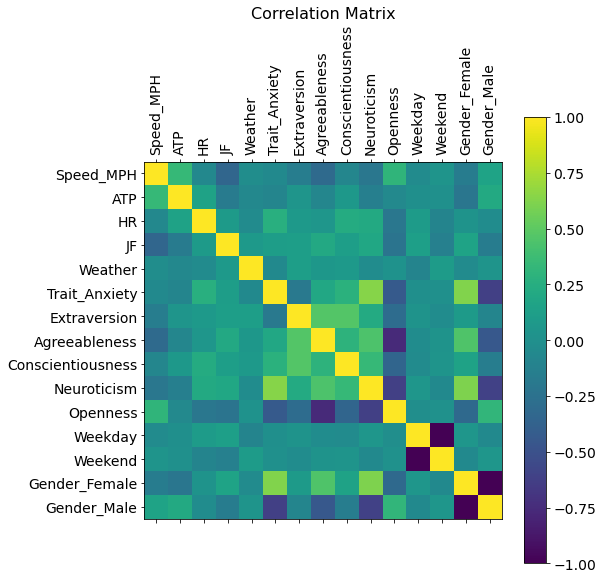

In [14]:
f = plt.figure(figsize=(8,8))
plt.matshow(df_2.corr(), fignum=f.number)
plt.xticks(range(df_2.select_dtypes(['number']).shape[1]), df_2.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_2.select_dtypes(['number']).shape[1]), df_2.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Scaling the Data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scalar=StandardScaler()

In [17]:
def scale_df(df):
    scalar=StandardScaler()
    scalar.fit(df)
    df_scale=scalar.transform(df)
    df_scaled=pd.DataFrame(data=df_scale, columns=df.columns)
    return df_scaled

In [18]:
df_scaled=scale_df(df_2)

In [19]:
df_scaled

,Speed_MPH,ATP,HR,JF,Weather,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
0,-1.268671,0.574404,1.532289,-0.478842,-0.131953,-0.712489,2.097135,0.83682,-1.098054,0.873260,-0.413953,0.614846,-0.614846,0.869607,-0.869607
1,-1.268671,0.574404,1.532289,-0.478842,-0.131953,-0.712489,2.097135,0.83682,-1.098054,0.873260,-0.413953,0.614846,-0.614846,0.869607,-0.869607
2,-1.268671,0.574404,1.532289,-0.478842,-0.131953,-0.712489,2.097135,0.83682,-1.098054,0.873260,-0.413953,0.614846,-0.614846,0.869607,-0.869607
3,-1.268671,0.574404,1.532289,-0.478842,-0.131953,-0.712489,2.097135,0.83682,-1.098054,0.873260,-0.413953,0.614846,-0.614846,0.869607,-0.869607
4,-1.268671,0.574404,1.532289,-0.478842,-0.131953,-0.712489,2.097135,0.83682,-1.098054,0.873260,-0.413953,0.614846,-0.614846,0.869607,-0.869607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330248,-1.268671,-0.405307,1.018027,0.009793,-0.131953,-0.712489,-1.267129,0.83682,-1.098054,-0.673933,-0.413953,-1.626425,1.626425,-1.149945,1.149945
330249,-1.268671,-0.446793,1.018027,0.009793,-0.131953,-0.712489,-1.267129,0.83682,-1.098054,-0.673933,-0.413953,-1.626425,1.626425,-1.149945,1.149945
330250,-1.268671,-0.478706,0.932316,0.009793,-0.131953,-0.712489,-1.267129,0.83682,-1.098054,-0.673933,-0.413953,-1.626425,1.626425,-1.149945,1.149945
330251,-1.268671,-0.495726,0.932316,0.009793,-0.131953,-0.712489,-1.267129,0.83682,-1.098054,-0.673933,-0.413953,-1.626425,1.626425,-1.149945,1.149945


In [20]:
# from scipy.stats import probplot
# for i in df_2.columns:
#     probplot(x=df_2[i],dist='norm',plot=plt)
#     plt.title(i)
#     plt.show()

In [21]:
# from sklearn.preprocessing import FunctionTransformer

In [22]:
# from sklearn.compose import ColumnTransformer

In [23]:
# df_2.columns

In [24]:
# df_2=df_2.drop('Src_Weather_Info', axis=1)

In [25]:
# log_transform = FunctionTransformer(lambda x: np.log(x))
# ct = ColumnTransformer(transformers=[['log_transform',log_transform,list(range(len(df_scaled.columns)))]],remainder='passthrough')
# log_X = ct.fit_transform(df_scaled).copy()
# log_X = pd.DataFrame(log_X,columns=df_scaled.columns).copy()

## Building the Network

In [26]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def calculate_spearman(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c])[1], 4)
    return pvalues
def calculate_pearson(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [27]:
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

In [28]:
corr = df_2.corr(method=spearmanr_pval)

In [29]:
corr

,Speed_MPH,ATP,HR,JF,Weather,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
Speed_MPH,1.000000e+00,0.000000e+00,4.140679e-244,0.000000e+00,1.219202e-48,2.518792e-108,0.000000e+00,0.000000e+00,4.024436e-304,0.000000e+00,0.000000e+00,6.897232e-91,6.897232e-91,0.000000e+00,0.000000e+00
ATP,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.413966e-04,0.000000e+00,5.404124e-27,9.685012e-27,9.685012e-27,0.000000e+00,0.000000e+00
HR,4.140679e-244,0.000000e+00,1.000000e+00,0.000000e+00,2.260170e-139,0.000000e+00,0.000000e+00,2.938277e-40,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.316115e-117,3.316115e-117
JF,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.841541e-25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Weather,1.219202e-48,0.000000e+00,2.260170e-139,9.841541e-25,1.000000e+00,2.033904e-239,0.000000e+00,0.000000e+00,0.000000e+00,6.350524e-03,5.334412e-66,0.000000e+00,0.000000e+00,2.790223e-67,2.790223e-67
Trait_Anxiety,2.518792e-108,0.000000e+00,0.000000e+00,0.000000e+00,2.033904e-239,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.778801e-02,2.778801e-02,0.000000e+00,0.000000e+00
Extraversion,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.214170e-46,9.214170e-46,0.000000e+00,0.000000e+00
Agreeableness,0.000000e+00,0.000000e+00,2.938277e-40,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.168951e-164,1.168951e-164,0.000000e+00,0.000000e+00
Conscientiousness,4.024436e-304,3.413966e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.080519e-75,1.080519e-75,0.000000e+00,0.000000e+00
Neuroticism,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.350524e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.427158e-153,1.427158e-153,0.000000e+00,0.000000e+00


In [30]:
df_2=(df_2-df_2.min())/(df_2.max()-df_2.min())

In [31]:
# corr_matrix=df_2.corr().abs()
# half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
# df_2.drop(dropped_columns, axis=1, inplace=True)
# dropped_columns

In [32]:
calculate_spearman(df_2)

,Speed_MPH,ATP,HR,JF,Weather,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
Speed_MPH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0003,0.0,0.0,0.0,0.0,0.0,0.0
HR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Weather,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0064,0.0,0.0,0.0,0.0,0.0
Trait_Anxiety,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0278,0.0278,0.0,0.0
Extraversion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agreeableness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Conscientiousness,0.0,0.0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Neuroticism,0.0,0.0,0.0,0.0,0.0064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_2.corr()

,Speed_MPH,ATP,HR,JF,Weather,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
Speed_MPH,1.000000,0.337219,-0.066845,-0.336951,-0.021618,-0.052987,-0.150406,-0.309287,-0.083129,-0.204290,0.307209,-0.037175,0.037175,-0.156944,0.156944
ATP,0.337219,1.000000,0.152635,-0.166584,-0.066849,-0.092275,0.045715,-0.081913,0.062596,-0.137437,-0.060080,-0.007561,0.007561,-0.218249,0.218249
HR,-0.066845,0.152635,1.000000,0.088065,-0.034497,0.263743,0.077326,0.051097,0.234215,0.215885,-0.205341,0.101225,-0.101225,0.024558,-0.024558
JF,-0.336951,-0.166584,0.088065,1.000000,0.079439,0.116008,0.124933,0.207944,0.117801,0.191687,-0.231600,0.127477,-0.127477,0.158763,-0.158763
Weather,-0.021618,-0.066849,-0.034497,0.079439,1.000000,-0.048388,0.124420,0.058839,0.072874,-0.024145,0.016563,-0.095316,0.095316,-0.035605,0.035605
Trait_Anxiety,-0.052987,-0.092275,0.263743,0.116008,-0.048388,1.000000,-0.194323,0.198776,0.275244,0.639384,-0.435011,-0.003053,0.003053,0.620249,-0.620249
Extraversion,-0.150406,0.045715,0.077326,0.124933,0.124420,-0.194323,1.000000,0.466863,0.466773,0.221157,-0.296832,0.028876,-0.028876,0.089114,-0.089114
Agreeableness,-0.309287,-0.081913,0.051097,0.207944,0.058839,0.198776,0.466863,1.000000,0.296557,0.439203,-0.764756,-0.027457,0.027457,0.452531,-0.452531
Conscientiousness,-0.083129,0.062596,0.234215,0.117801,0.072874,0.275244,0.466773,0.296557,1.000000,0.342565,-0.351476,-0.031321,0.031321,0.154117,-0.154117
Neuroticism,-0.204290,-0.137437,0.215885,0.191687,-0.024145,0.639384,0.221157,0.439203,0.342565,1.000000,-0.621122,0.048892,-0.048892,0.612527,-0.612527


In [34]:
import networkx as nx

In [35]:
from matplotlib.pyplot import figure

In [36]:
G=nx.Graph()

In [37]:
pvals=calculate_spearman(df_2)

In [38]:
columns=pvals.columns

In [39]:
pvalues=pvals.values

In [40]:
nonzero=[]
for row in pvalues:
    for val in row:
        if val!=0:
            nonzero.append(val)

In [41]:
benjamini_hochberg=[]

In [42]:
sort=sorted(nonzero)
for i in range(len(sort)):
    benjamini_hochberg.append((i+1)*0.05) 

In [43]:
benjamini_hochberg

[0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4]

In [44]:
sort

[0.0003, 0.0003, 0.0064, 0.0064, 0.0278, 0.0278, 0.0278, 0.0278]

In [45]:
# sm.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

In [46]:
columns

Index(['Speed_MPH', 'ATP', 'HR', 'JF', 'Weather', 'Trait_Anxiety',
       'Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism',
       'Openness', 'Weekday', 'Weekend', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [47]:
nonzeros={}
nonzeros['Indexes']=[]
nonzeros['Elements']=[]
nonzeros['Columns']=[]
for index, col in pvals.iteritems():
    counter=0
    arr=col.values
    for elem in arr:
        if elem>0:
            nonzeros['Indexes'].append(index)
            nonzeros['Elements'].append(elem)
            nonzeros['Columns'].append(columns[counter])
        counter+=1

In [48]:
df_map=pd.DataFrame()

In [49]:
df_map['Source']=nonzeros['Indexes']

In [50]:
df_map['Destination']=nonzeros['Columns']

In [51]:
df_map['Weights']=-np.log(nonzeros['Elements'])

In [52]:
df_map

,Source,Destination,Weights
0,ATP,Conscientiousness,8.111728
1,Weather,Neuroticism,5.051457
2,Trait_Anxiety,Weekday,3.582719
3,Trait_Anxiety,Weekend,3.582719
4,Conscientiousness,ATP,8.111728
5,Neuroticism,Weather,5.051457
6,Weekday,Trait_Anxiety,3.582719
7,Weekend,Trait_Anxiety,3.582719


In [53]:
G = nx.from_pandas_edgelist(df_map, source='Source', target='Destination',
                            edge_attr='Weights')

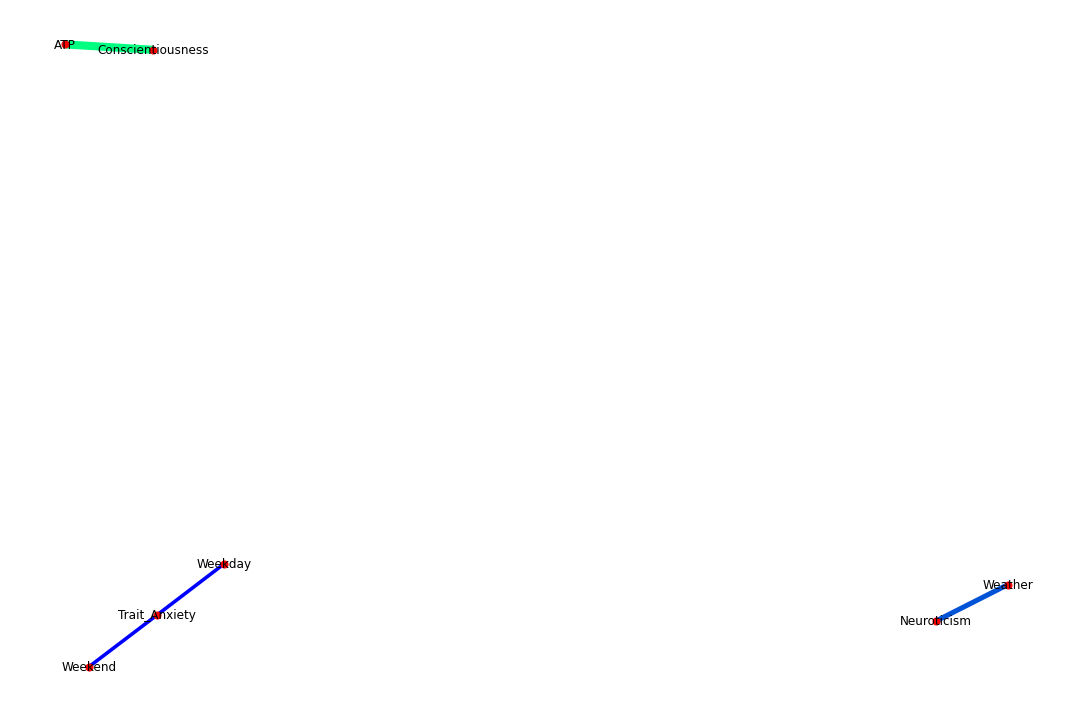

In [54]:
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors = range(172)

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='r')

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()

## Community Detection

In [55]:
import networkx.algorithms.community as nx_com

In [56]:
from community import community_louvain

We can define a new centrality measure that computes the sum of the absolute values of the weights from each node. 

In [57]:
def weighted_centrality(df):
    new_centrality={}
    for index, row in df.iterrows():
        if row['Source'] not in new_centrality.keys():
            new_centrality[row['Source']]=0
        new_centrality[row['Source']]+=np.abs(row['Weights'])
        if row['Destination'] not in new_centrality.keys():
            new_centrality[row['Destination']]=0
        new_centrality[row['Destination']]+=np.abs(row['Weights'])
    return new_centrality

The following method does the following: for a graph G, it applies the louvain detection algorithm 1000 times, and counts how often each pair of features is grouped together. It then determines the best way to split the features into distinct groups (communities). 

In [58]:
def louvain_detection(G):
    nodes=list(G.nodes())
    prevalences={}
    deg_centrality = nx.degree_centrality(G)
    widths = np.array([w for *_, w in G.edges.data('Weights')])
    centrality = np.fromiter(deg_centrality.values(), float)
    label = community_louvain.best_partition(G)
    mod = community_louvain.modularity(label, G)
    values = [label.get(node) for node in G.nodes()]
    for i in range(len(values)-1):
        for j in range(i+1, len(values)):
            prevalences[(nodes[i],nodes[j])]=0 #initialize dictionary containing how often each pair grouped together
    for i in range(1000):
        deg_centrality = nx.degree_centrality(G)
        centrality = np.fromiter(deg_centrality.values(), float)
        label = community_louvain.best_partition(G)
        mod = community_louvain.modularity(label, G)
        values = [label.get(node) for node in G.nodes()]
        for j in range(len(values)-1):
            for k in range(j+1, len(values)):
                if values[j]==values[k]:
                    prevalences[(nodes[j],nodes[k])]+=1 #add one if pair grouped together 
    consen={} #initialize consensus dictionary
    for node in nodes:
        consen[node]=[]
    for key in prevalences.keys():
        consen[key[0]].append((key[1],prevalences[key]))
    pairs=[]
    for key in consen.keys():
        for elem in consen[key]:
            if elem[1]>500: #if pair grouped together more than 50% of the time, 
                            #group the elements together in consensus network
                pairs.append((key, elem[0]))
    vals={} #initialize dictionary that contains final groupings
    for i in range(len(nodes)):
        vals[nodes[i]]=i
    for i in range(len(pairs)):
        vals[pairs[i][1]]=vals[pairs[i][0]]
    values=[] #initialize array that takes final groupings
    for i in range(len(nodes)):
        values.append(0)
    for key in vals.keys():
        values[nodes.index(key)]=vals[key] #
    #Draw the graph

    plt.figure(figsize=(15,10))



    pos = nx.spring_layout(G)
    nx.draw(G, pos, nodelist=nodes, node_color=values, node_size=500, cmap=plt.cm.hsv)

    nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    plt.show()
    
    

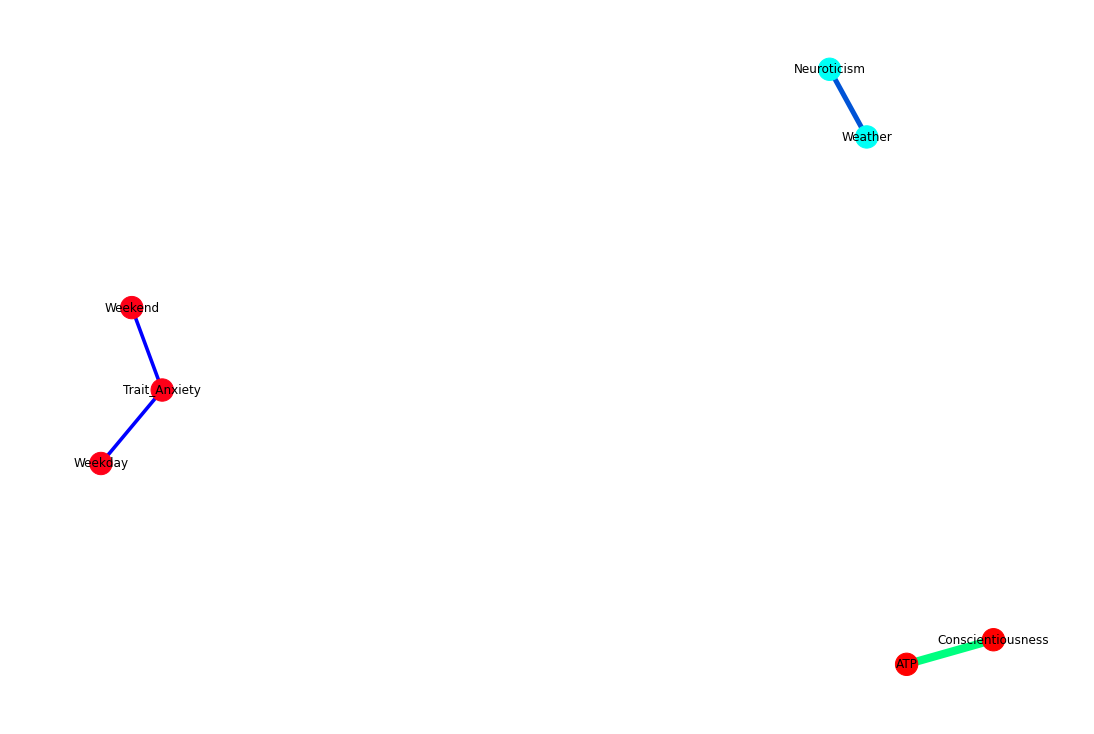

In [59]:
louvain_detection(G)

## Building the Markov Network

In [60]:
centrality=nx.eigenvector_centrality(G, weight=widths.any())

In [61]:
sorted((f"{c:0.2f}", v) for v, c in centrality.items())

[('0.00', 'ATP'),
 ('0.00', 'Conscientiousness'),
 ('0.00', 'Neuroticism'),
 ('0.00', 'Weather'),
 ('0.50', 'Weekday'),
 ('0.50', 'Weekend'),
 ('0.71', 'Trait_Anxiety')]

In [62]:
from sklearn.covariance import GraphicalLasso

In [63]:
def invcov(df):
    gl=GraphicalLasso()
    fit=gl.fit(df.values)
    inv_cov=pd.DataFrame(data=fit.covariance_,columns=df.columns)
    index={}
    for i in range(len(df.columns)):
        index[i]=df.columns[i]
    inv_cov.rename(index=index, inplace=True)
    return inv_cov

In [64]:
df_2.isna().sum()

Speed_MPH            0
ATP                  0
HR                   0
JF                   0
Weather              0
Trait_Anxiety        0
Extraversion         0
Agreeableness        0
Conscientiousness    0
Neuroticism          0
Openness             0
Weekday              0
Weekend              0
Gender_Female        0
Gender_Male          0
dtype: int64

In [65]:
inv_cov=invcov(df_2)

In [66]:
inv_cov

,Speed_MPH,ATP,HR,JF,Weather,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
Speed_MPH,0.065754,0.004888,0.000000,-0.001076,0.000000,-0.004607,-0.004660,-0.013342,-0.002536,-0.005987,0.009647,-0.000203,0.000193,-0.010643,0.010643
ATP,0.004888,0.029644,0.000000,-0.000080,0.000000,-0.003168,-0.000632,-0.002755,-0.000763,-0.002839,0.002151,-0.000146,0.000138,-0.008607,0.008607
HR,0.000000,0.000000,0.012585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
JF,-0.001076,-0.000080,0.000000,0.016432,0.000000,0.000075,0.000076,0.000218,0.000041,0.000098,-0.000158,0.000003,-0.000003,0.000174,-0.000174
Weather,0.000000,0.000000,0.000000,0.000000,0.011961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Trait_Anxiety,-0.004607,-0.003168,0.000000,0.000075,0.000000,0.099655,-0.008235,0.022318,0.011436,0.045912,-0.024250,0.001504,-0.001428,0.086952,-0.086953
Extraversion,-0.004660,-0.000632,0.000000,0.000076,0.000000,-0.008235,0.088353,0.030843,0.024228,0.008209,-0.015843,0.000223,-0.000212,0.009478,-0.009478
Agreeableness,-0.013342,-0.002755,0.000000,0.000218,0.000000,0.022318,0.030843,0.086621,0.014540,0.029885,-0.046138,0.001015,-0.000964,0.055948,-0.055949
Conscientiousness,-0.002536,-0.000763,0.000000,0.000041,0.000000,0.011436,0.024228,0.014540,0.060861,0.013410,-0.011626,0.000337,-0.000320,0.017939,-0.017939
Neuroticism,-0.005987,-0.002839,0.000000,0.000098,0.000000,0.045912,0.008209,0.029885,0.013410,0.076729,-0.032912,0.001286,-0.001222,0.074014,-0.074013


Define the data features into different modalities, like biometric data (gender and age), psychometric data (extraversion, neuroticism, etc.), and so on.

In [150]:
def create_invcov_df(df):
    modalities={'Speed_MPH':0,'ATP':0,'Weather':1,'Des_Weather_Info':1,'Age':5,'Trait_Anxiety':2,'Extraversion':2,'Agreeableness':2,'RTP':0,
           'Neuroticism':2,'Gender_Female':5,'Weekday':1,'Weekend':1,'HR_Norm':4,'Conscientiousness':2,'Free Flow':1,'JF':1,'Openness':2, 'Gender_Male':5,'HR':4}
    columns=df.columns
    nonzero={}
    nonzero['Indexes']=[]
    nonzero['Elements']=[]
    nonzero['Columns']=[]
    for index, col in df.iteritems():
        counter=0
        arr=col.values
        for elem in arr:
            if np.absolute(elem-1)>0.000001 and index!=columns[counter]: #eliminate correlations between same variable
                if modalities[index]*modalities[columns[counter]]!=5 and modalities[index]*modalities[columns[counter]]!=2 and (modalities[index],modalities[columns[counter]])!=(2,2):
                    nonzero['Indexes'].append(index)
                    nonzero['Elements'].append(elem*2)
                    nonzero['Columns'].append(columns[counter])
            counter+=1
    df_map=pd.DataFrame()
    df_map['Source']=nonzero['Indexes']
    df_map['Destination']=nonzero['Columns']
    df_map['Weights']=nonzero['Elements']
    return df_map

In [123]:
df_map2=create_invcov_df(inv_cov)

In [124]:
df_map2

,Source,Destination,Weights
0,Speed_MPH,ATP,0.009776
1,Speed_MPH,HR,0.000000
2,Speed_MPH,JF,-0.002152
3,Speed_MPH,Weather,0.000000
4,Speed_MPH,Trait_Anxiety,-0.009213
...,...,...,...
111,Gender_Male,Agreeableness,-0.111897
112,Gender_Male,Conscientiousness,-0.035879
113,Gender_Male,Neuroticism,-0.148027
114,Gender_Male,Openness,0.090597


In [125]:
G = nx.from_pandas_edgelist(df_map2, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 

In [126]:
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [127]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

First, the graph with all edges

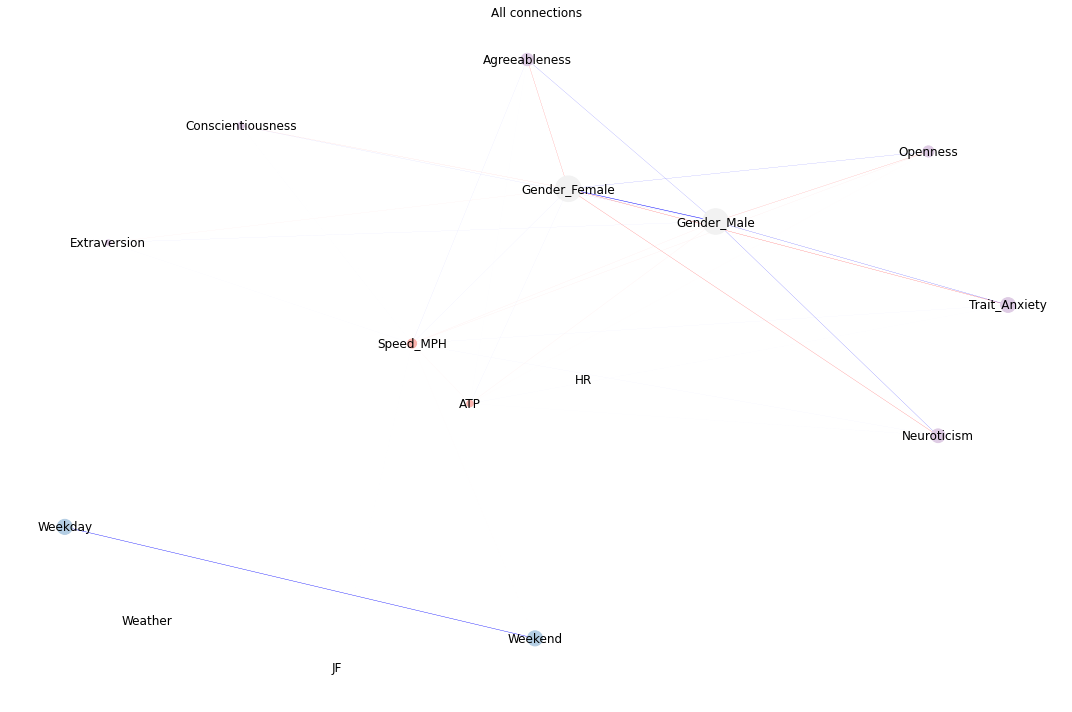

In [128]:
G = nx.from_pandas_edgelist(df_map2, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append(0.5)
    else:
        edge_color.append(-0.5)
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_map2)[node])*300 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel1)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color, edge_cmap=plt.cm.bwr)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("All connections")
plt.tight_layout()

In [129]:
df_map2

,Source,Destination,Weights
0,Speed_MPH,ATP,0.009776
1,Speed_MPH,HR,0.000000
2,Speed_MPH,JF,-0.002152
3,Speed_MPH,Weather,0.000000
4,Speed_MPH,Trait_Anxiety,-0.009213
...,...,...,...
111,Gender_Male,Agreeableness,-0.111897
112,Gender_Male,Conscientiousness,-0.035879
113,Gender_Male,Neuroticism,-0.148027
114,Gender_Male,Openness,0.090597


In [130]:
df_psych=scale_df(df_psych)

In [131]:
inv_psych=invcov(df_psych)

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:315: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -1.605e-03
  warnings.warn(


In [132]:
inv_psych

,HR,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male
HR,1.000000,0.253744,0.067330,0.061113,0.224210,0.205867,-0.195329,0.034561,-0.034559
Trait_Anxiety,0.253744,1.000000,-0.184357,0.208741,0.265264,0.629331,-0.425051,0.610247,-0.610251
Extraversion,0.067330,-0.184357,1.000000,0.456855,0.456779,0.211140,-0.306843,0.079117,-0.079116
Agreeableness,0.061113,0.208741,0.456855,1.000000,0.292996,0.449146,-0.754783,0.442524,-0.442532
Conscientiousness,0.224210,0.265264,0.456779,0.292996,1.000000,0.332547,-0.341484,0.164114,-0.164117
Neuroticism,0.205867,0.629331,0.211140,0.449146,0.332547,1.000000,-0.611145,0.602519,-0.602527
Openness,-0.195329,-0.425051,-0.306843,-0.754783,-0.341484,-0.611145,1.000000,-0.327304,0.327305
Gender_Female,0.034561,0.610247,0.079117,0.442524,0.164114,0.602519,-0.327304,1.000000,-0.990000
Gender_Male,-0.034559,-0.610251,-0.079116,-0.442532,-0.164117,-0.602527,0.327305,-0.990000,1.000000


In [133]:
df_mapsych=create_invcov_df(inv_psych)

In [134]:
df_mapsych

,Source,Destination,Weights
0,HR,Trait_Anxiety,0.507489
1,HR,Extraversion,0.134661
2,HR,Agreeableness,0.122227
3,HR,Conscientiousness,0.448420
4,HR,Neuroticism,0.411733
5,HR,Openness,-0.390659
6,HR,Gender_Female,0.069121
7,HR,Gender_Male,-0.069118
8,Trait_Anxiety,HR,0.507489
9,Trait_Anxiety,Gender_Female,1.220495


In [135]:
G = nx.from_pandas_edgelist(df_mapsych, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [170]:
modalities={'Speed_MPH':'orangered','ATP':'orangered','Weather':'deepskyblue','Des_Weather_Info':'m','Age':'gold','Trait_Anxiety':'turquoise','Extraversion':'c','Agreeableness':'c','RTP':'royalblue',
           'Neuroticism':'c','Gender_Female':'gold','Weekday':'deepskyblue','Weekend':'deepskyblue','HR':'tab:orange','Conscientiousness':
            'c','Free Flow':'violet','JF':'deepskyblue','Openness':'c', 'Gender_Male':'gold','HR':'tab:orange'}

In [171]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

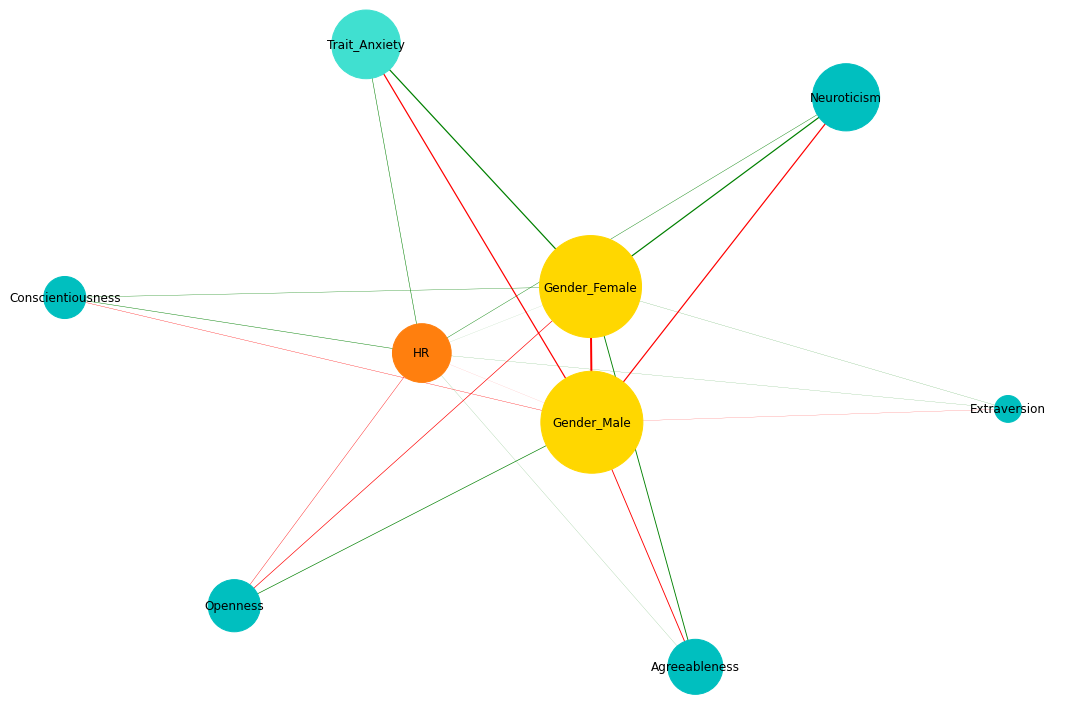

In [172]:
G = nx.from_pandas_edgelist(df_mapsych, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append('g')
    else:
        edge_color.append('r')
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7)
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_mapsych)[node])*800 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist])

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()
plt.savefig('Markov_Psych.png')

In [143]:
df_2

,Speed_MPH,ATP,HR,JF,Weather,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Weekend,Gender_Female,Gender_Male
0,0.0,0.349451,0.480769,0.064059,0.0,0.25,1.0,0.833333,0.2,0.571429,0.428571,1.0,0.0,1.0,0.0
1,0.0,0.349451,0.480769,0.064059,0.0,0.25,1.0,0.833333,0.2,0.571429,0.428571,1.0,0.0,1.0,0.0
2,0.0,0.349451,0.480769,0.064059,0.0,0.25,1.0,0.833333,0.2,0.571429,0.428571,1.0,0.0,1.0,0.0
3,0.0,0.349451,0.480769,0.064059,0.0,0.25,1.0,0.833333,0.2,0.571429,0.428571,1.0,0.0,1.0,0.0
4,0.0,0.349451,0.480769,0.064059,0.0,0.25,1.0,0.833333,0.2,0.571429,0.428571,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330248,0.0,0.180769,0.423077,0.126696,0.0,0.25,0.0,0.833333,0.2,0.142857,0.428571,0.0,1.0,0.0,1.0
330249,0.0,0.173626,0.423077,0.126696,0.0,0.25,0.0,0.833333,0.2,0.142857,0.428571,0.0,1.0,0.0,1.0
330250,0.0,0.168132,0.413462,0.126696,0.0,0.25,0.0,0.833333,0.2,0.142857,0.428571,0.0,1.0,0.0,1.0
330251,0.0,0.165201,0.413462,0.126696,0.0,0.25,0.0,0.833333,0.2,0.142857,0.428571,0.0,1.0,0.0,1.0


In [144]:
df_nops=df_2.drop(['Openness','Conscientiousness','Agreeableness','Extraversion','Neuroticism'],axis=1)

In [145]:
import pingouin as pg

In [146]:
df_nops=scale_df(df_nops)

In [147]:
inv_nops=invcov(df_nops)

In [151]:
df_manos=create_invcov_df(inv_nops)

In [152]:
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [153]:
modalities={'Speed_MPH':'orangered','ATP':'orangered','Weather':'deepskyblue','Des_Weather_Info':'m','Age':'gold','Trait_Anxiety':'turquoise','Extraversion':'c','Agreeableness':'c','RTP':'royalblue',
           'Neuroticism':'c','Gender_Female':'gold','Weekday':'deepskyblue','Weekend':'deepskyblue','HR':'tab:orange','Conscientiousness':
            'c','Free Flow':'violet','JF':'deepskyblue','Openness':'c', 'Gender_Male':'gold','HR':'tab:orange'}

In [154]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

In [155]:
from matplotlib.lines import Line2D

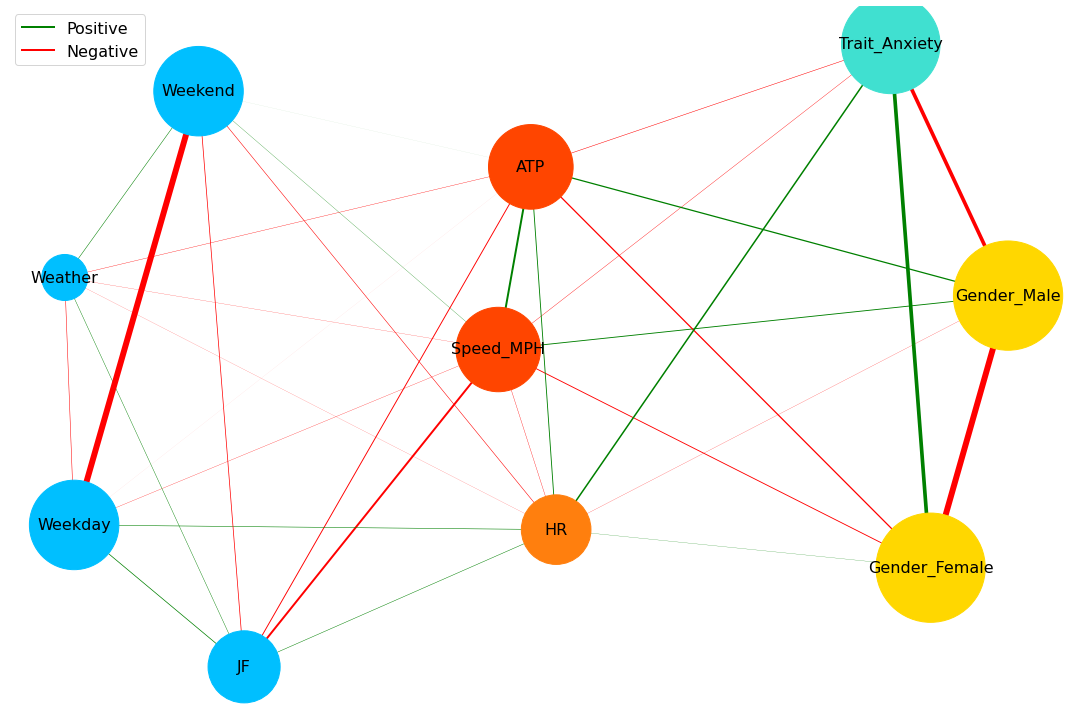

In [159]:
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w*3 for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append('g')
    else:
        edge_color.append('r')
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_manos)[node])*1500 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist])

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color)

nx.draw_networkx_labels(G, pos, font_size=16, font_family="sans-serif")


ax = plt.gca()
ax.margins(0.01)
ax.title.set_size(50)
plt.axis("off")
plt.tight_layout()

# plt.scatter([],[], c='g', label='Positive')
# plt.scatter([],[], c='r', label='Negative')

# plt.legend(loc='upper left', prop={'size': 16})
custom_lines = [Line2D([0], [0], color='green', lw=2),
            Line2D([0], [0], color='red', lw=2)]

plt.legend(custom_lines, ['Positive', 'Negative'], loc='upper left',prop={'size':16})
plt.savefig('Markov.png')

In [ ]:
def louvain_detection(G):
    nodes=list(G.nodes())
    prevalences={}
    deg_centrality = nx.degree_centrality(G)
    widths = np.array([w for *_, w in G.edges.data('Weights')])
    centrality = np.fromiter(deg_centrality.values(), float)
    label = community_louvain.best_partition(G, partition=modalities, weight='weight',  randomize=True)
    mod = community_louvain.modularity(label, G, weight='weight')
    values = [label.get(node) for node in G.nodes()]
    for i in range(len(values)-1):
        for j in range(i+1, len(values)):
            prevalences[(nodes[i],nodes[j])]=0 #initialize dictionary containing how often each pair grouped together
    for i in range(1000):
        deg_centrality = nx.degree_centrality(G)
        centrality = np.fromiter(deg_centrality.values(), float)
        label = community_louvain.best_partition(G, partition=modalities, weight='weight', resolution=100, randomize=True)
        mod = community_louvain.modularity(label, G, weight='weight')
        values = [label.get(node) for node in G.nodes()]
        for j in range(len(values)-1):
            for k in range(j+1, len(values)):
                if values[j]==values[k]:
                    prevalences[(nodes[j],nodes[k])]+=1 #add one if pair grouped together 
    consen={} #initialize consensus dictionary
    for node in nodes:
        consen[node]=[]
    for key in prevalences.keys():
        consen[key[0]].append((key[1],prevalences[key]))
    pairs=[]
    for key in consen.keys():
        for elem in consen[key]:
            if elem[1]>500: #if pair grouped together more than 50% of the time, 
                            #group the elements together in consensus network
                pairs.append((key, elem[0]))
    vals={} #initialize dictionary that contains final groupings
    for i in range(len(nodes)):
        vals[nodes[i]]=i
    for i in range(len(pairs)):
        vals[pairs[i][1]]=vals[pairs[i][0]]
    values=[] #initialize array that takes final groupings
    for i in range(len(nodes)):
        values.append(0)
    for key in vals.keys():
        values[nodes.index(key)]=vals[key] #
    #Draw the graph

    plt.figure(figsize=(15,10))
    colours=[]
    K = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights')
    colors = np.array([w for *_, w in K.edges.data('Weights')])
    for color in colors:
        if color>0:
            colours.append('g')
        else:
            colours.append('r')



    pos = nx.spring_layout(G)
    nx.draw(G, pos, nodelist=nodes, node_color=values, node_size=[np.absolute(weighted_centrality(df_manos)[node])*1000 for node in nodes], cmap=plt.cm.Pastel1)

    nx.draw_networkx_edges(G, pos, width=widths, edge_color=colours)

    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    plt.show()

In [ ]:
louvain_detection(G)

In [ ]:
K=community_louvain.induced_graph(modalities, G,weight='weight')

In [99]:
weighted_centrality(df_map)

{'ATP': 16.223456166616145,
 'Conscientiousness': 16.223456166616145,
 'Src_Weather_Info': 10.102914577233022,
 'Neuroticism': 10.102914577233022,
 'Trait_Anxiety': 14.330877033142183,
 'Weekday': 7.165438516571092,
 'Weekend': 7.165438516571092}

In [100]:
inv_cov['ATP'].sort_values()

Gender_Female       -0.008607
Trait_Anxiety       -0.003141
Neuroticism         -0.002828
Agreeableness       -0.002753
Conscientiousness   -0.000788
Extraversion        -0.000762
Age                 -0.000620
Weekday             -0.000087
Jam Factor          -0.000080
BPM                  0.000000
Src_Weather_Info     0.000000
Weekend              0.000083
Openness             0.002189
Speed                0.004888
Gender_Male          0.008607
ATP                  0.029644
Name: ATP, dtype: float64

In [101]:
inv_cov['Speed'].sort_values()

Agreeableness       -0.013342
Gender_Female       -0.010718
Neuroticism         -0.005854
Extraversion        -0.004675
Trait_Anxiety       -0.004242
Conscientiousness   -0.002491
Age                 -0.001579
Jam Factor          -0.001076
Weekday             -0.000123
BPM                  0.000000
Src_Weather_Info     0.000000
Weekend              0.000117
ATP                  0.004888
Openness             0.009648
Gender_Male          0.010718
Speed                0.065754
Name: Speed, dtype: float64